In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
HERE = Path(_dh[-1])

## Convert mol2 to SDF
As Rdkit prefers SDF files, Here we will use Open babel package to convert mol2 moleucles to SDF

In [3]:
%%bash

obabel comp1_multi22-aligned.mol2 -O compounds.sdf

22 molecules converted


## Read the activities file

In [4]:
file = 'comp1_multi22-activiti'

In [5]:
with open(file, 'r') as lines : 
    activites = []
    names = []
    next(lines)
    for line in lines:
        acti = line.split('\t')[1]
        activites.append(float(acti))
        name = line.split('"')[1]
        names.append(str(name))

## Read the SDF file

Here we will read the sdf files and we will stor them in a list of molecules called mols

In [6]:
mols = []
for m in Chem.SDMolSupplier('compounds.sdf'):
    if m is not None :
        mols.append(m)

In [7]:
len(mols)

22

### Draw molecules
We will drow them using MolsToGridImage tool

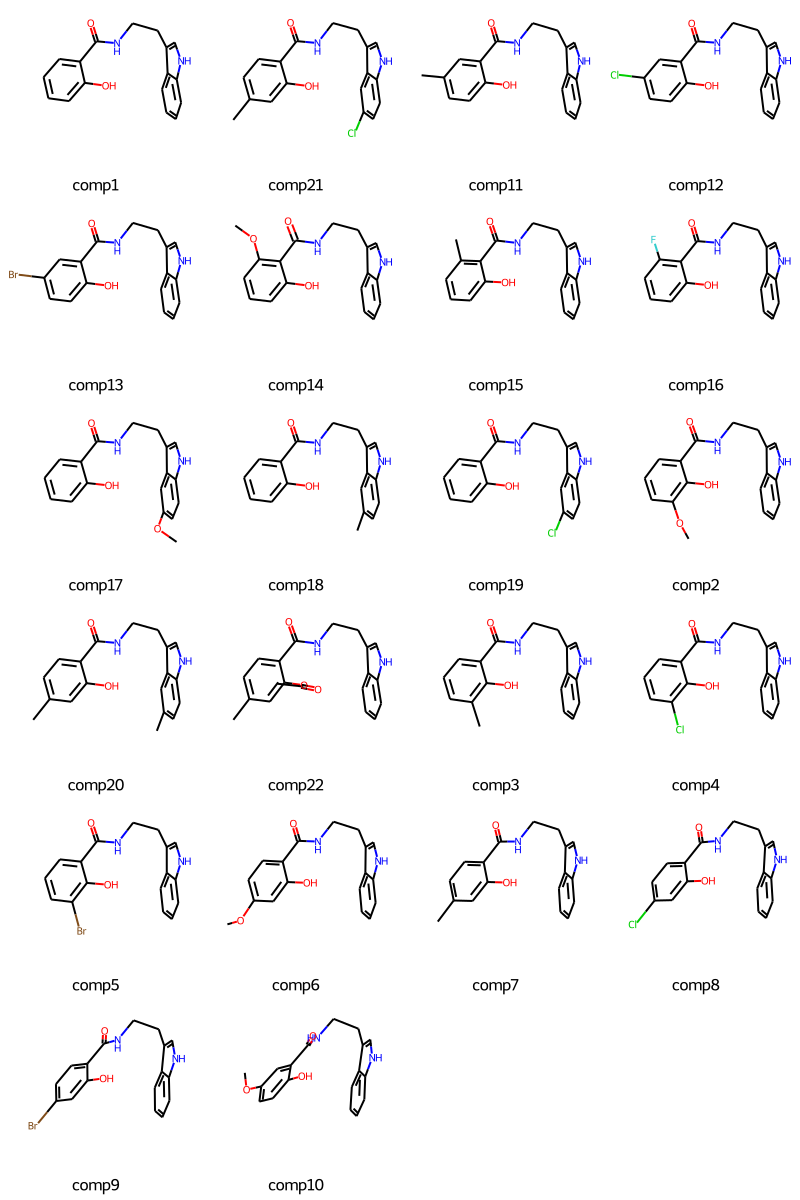

In [33]:
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, legends=names)

In [34]:
fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mols]

In [35]:
def fps_to_df(fps):
    columns = ['fingerprints']
    for fp in fps:
#         arr = np.zeros((1,))
#         DataStructs.ConvertToNumpyArray(fp, arr)
    
        return pd.DataFrame(fps, columns = columns)

In [36]:
df = fps_to_df(fps)
df.set_axis(names, inplace= True)
df['pIC50'] = activites

In [37]:
df

,fingerprints,pIC50
comp1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",8.09
comp21,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",6.36
comp11,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",6.22
comp12,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.87
comp13,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",6.31
comp14,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",12.29
comp15,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",13.05
comp16,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",9.99
comp17,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",12.05
comp18,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",4.53


## Devid the dataset into trainng and test sets

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# X_train, X_test, y_train, y_test = train_test_split(np.asarray(list(df['fingerprints'].values)), df['pIC50'].astype('float'), test_size=0.30, random_state=82)

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(np.asarray(list(df['fingerprints'].values)), df['pIC50'].astype('float'), test_size=0.20, random_state=62)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(list(df['fingerprints'].values)), df['pIC50'].astype('float'), test_size=0.20, random_state=26)

In [42]:
y_train.dtype

dtype('float64')

In [43]:
# from sklearn.preprocessing import StandardScaler

# scale = StandardScaler().fit(X_train)
# X_train = scale.transform(X_train)

In [44]:
# X_train

In [45]:
sum(df['pIC50'])/len(df['pIC50'])

9.473636363636365

## Create the different models 
### 1. import the modules

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

### 2 . Defining learning regressors

In [47]:
Reg_names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
        # "Naive_Bayes", #"QDA",
             "SGD"]

regressors = [
    KNeighborsRegressor(3),
    SVR(kernel="linear", C=0.025),
    SVR(kernel="poly", degree=3, C=0.025),
    SVR(kernel="rbf", C=1, gamma=2),
    GaussianProcessRegressor(1.0 * RBF(1.0)),
    GradientBoostingRegressor(n_estimators=100, learning_rate=1.0),
    DecisionTreeRegressor(max_depth=5),
    ExtraTreesRegressor(n_estimators=10, min_samples_split=2),
    RandomForestRegressor(max_depth=5, n_estimators=100),
    MLPRegressor(alpha=1, max_iter=1000),
    AdaBoostRegressor(n_estimators=100),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
    SGDRegressor(loss="squared_loss", penalty="l2")]

In [48]:
scoresT = []
MSET = []
# y_PredT = []
for name, reg in zip(Reg_names, regressors):
    reg.fit(X_train, y_train)
    score = reg.score(X_train, y_train)
    scoresT.append(score)
#     predT = reg.predict(X_train)
#     y_PredT.append(predT)
    mse = mean_squared_error(y_train, reg.predict(X_train))
    MSET.append(mse)

/home/aouidate/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [49]:
df = pd.DataFrame()
df['names'] = Reg_names
df['scores'] = scoresT
df['MSE'] = MSET
df

,names,scores,MSE
0,Nearest_Neighbors,0.497577,5.013850e+00
1,Linear_SVM,0.213210,7.851637e+00
2,Polynomial_SVM,-0.015439,1.013340e+01
3,RBF_SVM,0.462901,5.359894e+00
4,Gaussian_Process,1.000000,1.961801e-21
5,Gradient_Boosting,1.000000,0.000000e+00
6,Decision_Tree,0.992802,7.183193e-02
7,Extra_Trees,1.000000,2.412986e-30
8,Random_Forest,0.857353,1.423521e+00
9,Neural_Net,0.996783,3.210355e-02


### 2.1 adding colors to the dataframes

In [50]:
cm = sns.light_palette(color= 'red', as_cmap= True)
s = df.style.background_gradient(cmap= cm)
s

,names,scores,MSE
0,Nearest_Neighbors,0.497577,5.013850
1,Linear_SVM,0.213210,7.851637
2,Polynomial_SVM,-0.015439,10.133404
3,RBF_SVM,0.462901,5.359894
4,Gaussian_Process,1.000000,0.000000
5,Gradient_Boosting,1.000000,0.000000
6,Decision_Tree,0.992802,0.071832
7,Extra_Trees,1.000000,0.000000
8,Random_Forest,0.857353,1.423521
9,Neural_Net,0.996783,0.032104


## 2.2 Bar plots for model performances

In [51]:
# sns.set_style(style= 'whitegrid')
# ax = sns.barplot(x = df['scores'], y = df['names'], data= df)

<AxesSubplot:xlabel='MSE', ylabel='names'>

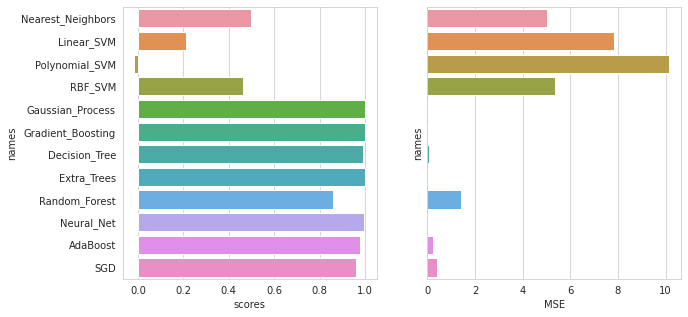

In [52]:
sns.set_style(style= 'whitegrid')
f, axs = plt.subplots(1, 2, sharey= True, figsize=(10,5))
#scores
sns.barplot(ax =axs[0], x =df['scores'], y = df['names'] )
#MSE
sns.barplot(ax =axs[1], x =df['MSE'], y = df['names'] )

In [53]:
scores = []
MSETest = []
for name, reg in zip(Reg_names, regressors):
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    scores.append(score)
    mse = mean_squared_error(y_test, reg.predict(X_test))
    MSETest.append(mse)

/home/aouidate/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [54]:
df1 = pd.DataFrame()
df1['names'] = Reg_names
df1['scores'] = scores
df1['MSE'] = MSETest
df1

,names,scores,MSE
0,Nearest_Neighbors,-0.056143,15.138902
1,Linear_SVM,0.085937,13.102300
2,Polynomial_SVM,-0.006085,14.421366
3,RBF_SVM,-0.011613,14.500600
4,Gaussian_Process,0.248765,10.768307
5,Gradient_Boosting,-0.796959,25.757848
6,Decision_Tree,0.567320,6.202089
7,Extra_Trees,0.556912,6.351279
8,Random_Forest,0.120294,12.609826
9,Neural_Net,0.317095,9.788849


In [55]:
cm = sns.light_palette(color= 'green', as_cmap= True )
s1 = df1.style.background_gradient(cmap=cm)
s1

,names,scores,MSE
0,Nearest_Neighbors,-0.056143,15.138902
1,Linear_SVM,0.085937,13.102300
2,Polynomial_SVM,-0.006085,14.421366
3,RBF_SVM,-0.011613,14.500600
4,Gaussian_Process,0.248765,10.768307
5,Gradient_Boosting,-0.796959,25.757848
6,Decision_Tree,0.567320,6.202089
7,Extra_Trees,0.556912,6.351279
8,Random_Forest,0.120294,12.609826
9,Neural_Net,0.317095,9.788849


<AxesSubplot:xlabel='MSE', ylabel='names'>

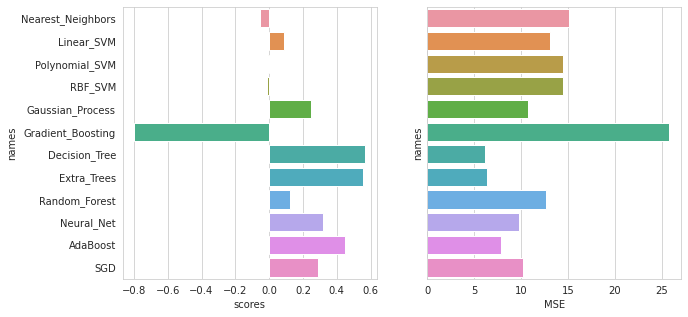

In [56]:
fig, axes = plt.subplots(1, 2, sharey= True, figsize = (10,5))

#scores
sns.barplot(ax= axes[0], x= df1['scores'], y = df1['names'])

#scores
sns.barplot(ax= axes[1], x= df1['MSE'], y = df1['names'])

## Mordred descriptors

In [73]:
from mordred import Calculator, descriptors

In [74]:
calc = Calculator(descriptors, ignore_3D=True)

In [75]:
dfM = calc.pandas(mols)

100%|████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 16.61it/s]


In [77]:
dfM.isnull().sum().sum()

0

In [81]:
XM_train, XM_test, yM_train, yM_test = train_test_split(dfM, 
                                                    df['pIC50'].astype('float'), 
                                                    test_size=0.20, 
                                                    random_state=982)

In [82]:
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

In [84]:
sel = DropCorrelatedFeatures(threshold=0.8,
                              method='pearson',
                              missing_values='ignore')
sel.fit(XM_train)

DropCorrelatedFeatures()

In [86]:
len(sel.features_to_drop_)

1008

In [87]:
# drop correlated features

XM1_train = sel.transform(XM_train)
XM1_test = sel.transform(XM_test)

XM1_train.shape, XM1_test.shape

((17, 605), (5, 605))

## SmartCorrelationSelection
### Model Performance


In [97]:
sel1 = SmartCorrelatedSelection(threshold=0.2,
                              method='pearson',
                              missing_values='ignore')
sel1.fit(XM1_train)

SmartCorrelatedSelection(threshold=0.2)

In [98]:
# drop correlated features

XM2_train = sel1.transform(XM1_train)
XM2_test = sel1.transform(XM1_test)

XM2_train.shape, XM2_test.shape

((17, 473), (5, 473))